# All the Basic operation of OpenCV to an Image with Necessary Documentations

**I will show the following basic image Transformation Operarion**
1. Image Resize
2. Image Rotate
3. Image Translation
4. Image Bluring
5. image Flapping
6. Edge Detection
7. Histogram
8. Applying Mask in an Image


# Read Image

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image_original=cv2.imread('../input/catimagedataset/cat.jpg') # Read a Cat Image

In [3]:
image_original.shape

(280, 300, 3)

**OpenCV reads the colored image as BGR and not in RGB mode. This means the sequence of the channel is Blue, Green, and Red. It is however possible to convert it to RGB colorspace by using the cvtColor() function of OpenCV. But to keep it simple we will use the BGR colorspace only to show you how the cv2.split() function works in OpenCV.**


In [4]:
def imageShow(title,image):
    imagedata=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(imagedata)
    plt.title(title)
    plt.show()

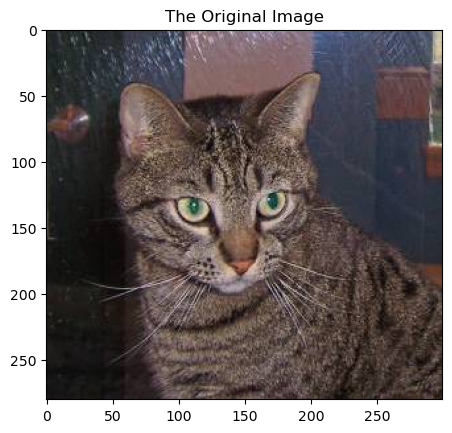

In [5]:
imageShow('The Original Image',image_original)

**Now we pass the image to the cv2.split() function that returns its three channels captured by blue, green, and red variables respectively.**

In [6]:
blue,green,red=cv2.split(image_original)

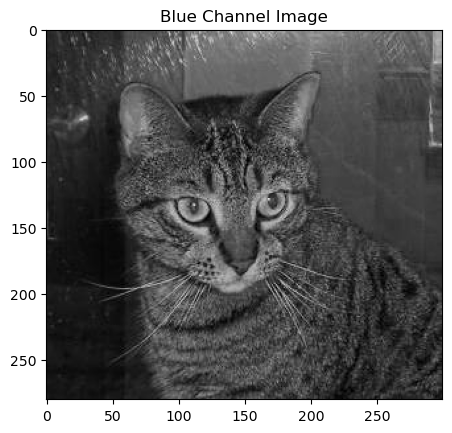

In [7]:
imageShow('Blue Channel Image',blue)

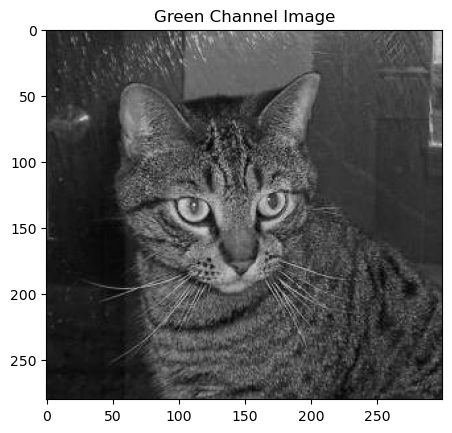

In [8]:
imageShow('Green Channel Image',green)

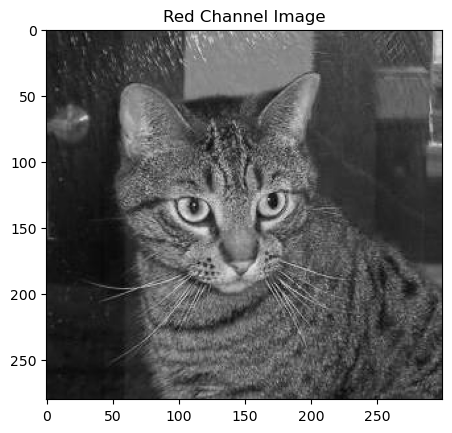

In [9]:
imageShow('Red Channel Image',red)

# 1. Resize of a image

Need to know about image resize
1. Image resizing refers to the scaling of images
2. It helps in reducing the number of pixels from an image and that has several advantages
Image resizing refers to the scaling of images. Scaling comes in handy in many image processing as well as machine learning applications. It helps in reducing the number of pixels from an image and that has several advantages e.g. It can reduce the time of training of a neural network as the more the number of pixels in an image more is the number of input nodes that in turn increases the complexity of the model.
It also helps in zooming in on images. Many times we need to resize the image i.e. either shrink it or scale it up to meet the size requirements. OpenCV provides us several interpolation methods for resizing an image.

# Interpolation Method for Resizing:

* cv2.INTER_AREA: This is used when we need to shrink an image.
* cv2.INTER_CUBIC: This is slow but more efficient.
* cv2.INTER_LINEAR:This is primarily used when zooming is required. 
This is the default interpolation technique in OpenCV.

**Syntax: cv2.resize(source, dsize, dest, fx, fy, interpolation)**

Parameters:
* source: Input Image array (Single-channel, 8-bit or floating-point) 
* dsize: Size of the output array
* dest: Output array (Similar to the dimensions and type of Input image array) [optional]
* fx: Scale factor along the horizontal axis  [optional]
* fy: Scale factor along the vertical axis  [optional]
* interpolation: One of the above interpolation methods  [optional]

In [10]:
def imageResize(image,new_Dimension): # cv2.INTER_AREA is use to shrink the image 
    shrink_image=cv2.resize(image,new_Dimension,interpolation=cv2.INTER_AREA)
    zoom_image=cv2.resize(image,new_Dimension,interpolation=cv2.INTER_CUBIC)
    linear_image=cv2.resize(image,new_Dimension,interpolation=cv2.INTER_LINEAR)
    return  shrink_image,zoom_image,linear_image


**Using Magic Number 120, We Calculate New Dimension of an Image**

In [11]:
new_height=int((120/image_original.shape[0])*image_original.shape[1])
new_width=int((120/image_original.shape[1])*image_original.shape[0])

In [12]:
new_dimension=(new_height,new_width)

In [13]:
#new_dimension=(int(image_original.shape[0]/2),int(image_original.shape[1]/2))

In [14]:
new_dimension

(128, 112)

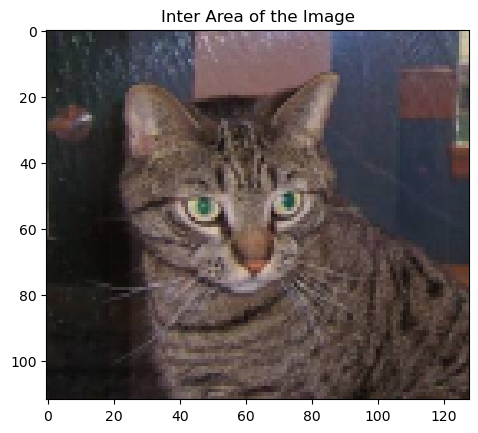

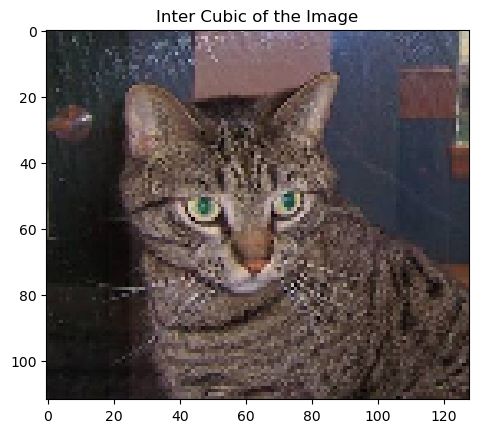

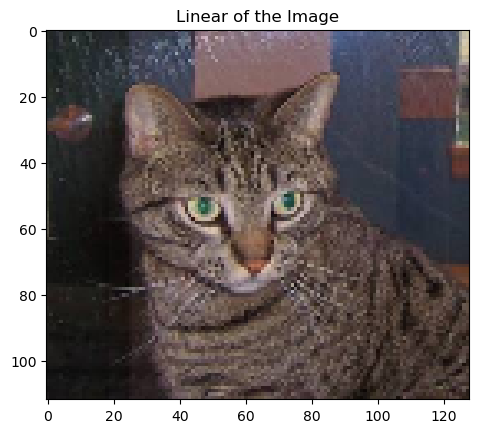

In [15]:
shrink_image,zoom_image,linear_image=imageResize(image_original,new_dimension)
#zoom_image=imageResize(image_original,new_dimension)
imageShow('Inter Area of the Image',shrink_image)
imageShow('Inter Cubic of the Image',zoom_image)
imageShow('Linear of the Image',linear_image)


# 2. Image Rotation

Rotating an image :- Images can be rotated to any degree clockwise or otherwise. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor. 

In [16]:
def imageRotation(image,angle):
    height,width=image.shape[:2]
    center=(width/2,height/2)
    # getRotationMatrix2D creates a matrix needed for transformation.
    # We want matrix for rotation w.r.t center to 45 degree without scaling.
    matrix_rotate=cv2.getRotationMatrix2D(center,angle,1)
    rotate_image=cv2.warpAffine(image,matrix_rotate,(height,width))
    return rotate_image

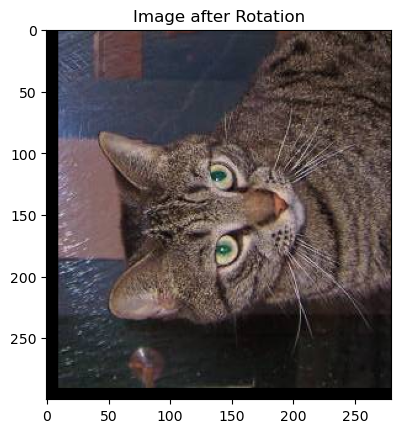

In [17]:
rotate_image=imageRotation(image_original,90)
imageShow('Image after Rotation',rotate_image)

# 3. Translating an Image

# Translating an image means shifting an image agiven frame of reference. 

#Create translation matrix.
#If the shift is (x, y) then matrix would be
#M = [1 0 x]
    #[0 1 y]
#Let's shift by (100, 50).
M = np.float32([[1, 0, 100], [0, 1, 50]])

In [18]:
# Create translation matrix.
# If the shift is (x, y) then matrix would be
# M = [1 0 x]
#     [0 1 y]
# Let's shift by (100, 50)

def imageTranslation(image):
    height,width=image.shape[:2]
    M = np.float32([[1, 0, -100], [0, 1, -100]])
    translate_image=cv2.warpAffine(image,M,(height,width))
    return translate_image

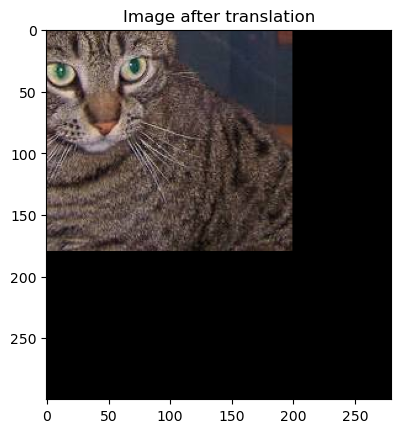

In [19]:
translate_image=imageTranslation(image_original)
imageShow('Image after translation',translate_image)

# 4. Image Bluring
Image bluring use to make image less clear or distinct. Image bluring is done with the help of various low pass filter kernel. 
Image bluring is used in various purpose for example noise removal, smoothing image, removing low intesity image. The real life example is: in many cases police wand to hide the victiom picture

**Important types of blurring:**

**Gaussian Blurring**: Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models.
E.g. of a Gaussian kernel(3×3)
  1/16| 1 2 1 |
      | 2 4 2 |
      | 1 2 1 |
   
**Median Blur**: The Median Filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise. It is one of the best algorithms to remove Salt and pepper noise.

**Bilateral Blur**: A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.

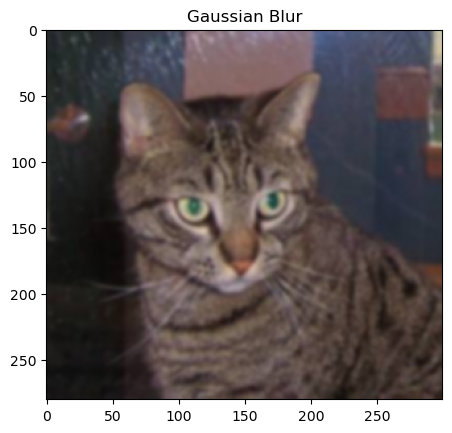

In [20]:
Gaussian=cv2.GaussianBlur(image_original,(7,7),0) # GaussianBlur(src,ksize,)
imageShow('Gaussian Blur',Gaussian)

dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType=BORDER_DEFAULT]]] )
**src**= input image, **ksize**= Gaussian Kernel Size. [height width]. height and width should be odd and can have different values. If ksize is set to [0 0], then ksize is computed from sigma values.
**SigmaX**= Kernel standard deviation along X-axis (horizontal direction).
**SigmaY**= Kernel standard deviation along Y-axis (vertical direction). If sigmaY=0, then sigmaX value is taken for sigmaY
**borderType**= Specifies image boundaries while kernel is applied on image borders. Possible values are : cv.BORDER_CONSTANT cv.BORDER_REPLICATE cv.BORDER_REFLECT cv.BORDER_WRAP cv.BORDER_REFLECT_101 cv.BORDER_TRANSPARENT cv.BORDER_REFLECT101 cv.BORDER_DEFAULT cv.BORDER_ISOLATED


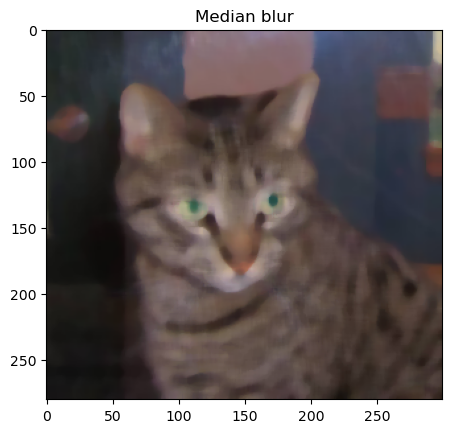

In [21]:
median=cv2.medianBlur(image_original,9) #Median Blur 
imageShow('Median blur',median)

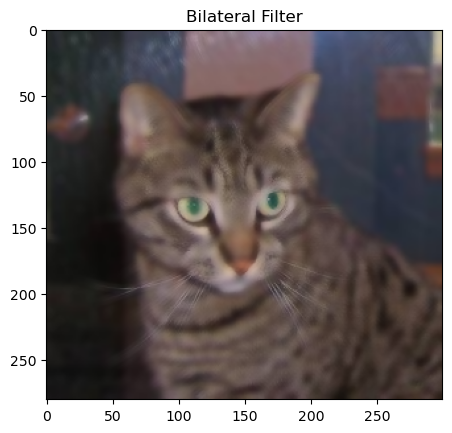

In [22]:
bilateral=cv2.bilateralFilter(image_original,9,240,240)
imageShow('Bilateral Filter',bilateral)

bilateralFilter(src, dst, d, sigmaColor, sigmaSpace, borderType)
**dst**: A Mat object representing the destination (output image) for this operation.
**d**: A variable of the type integer representing the diameter of the pixel neighborhood.
**sigmaColor**: A variable of the type integer representing the filter sigma in the color space.
**sigmaSpace**: A variable of the type integer representing the filter sigma in the coordinate space.
**borderType**: An integer object representing the type of the border used.

# 5. Edge Detection

Edge detection is an image-processing technique that is used to identify the boundaries (edges) of objects or regions within an image. Edges are among the most important features associated with images. We know the underlying structure of an image through its edges. Computer vision processing pipelines, therefore, extensively use edge detection in 
applications.

Sudden changes in pixel intensity characterize edges. We need to look for such changes in the neighboring pixels to detect edges. Let’s explore using two important edge-detection algorithms available in OpenCV: Sobel Edge Detection and Canny Edge Detection. We will discuss the theory as well as demonstrate the use of each in OpenCV.

Before using the Sobel Edge Detection we first need to reduce the noise of the image. we first need to Blure the image by using Gaussian Blue.
In edge detection, numerical derivatives of the pixel intensities have to be computed, and this typically results in ‘noisy’ edges. In other words, the intensity of neighboring pixels in an image (especially near edges) can fluctuate quite a bit, giving rise to edges that don’t represent the predominant edge structure we are looking for. 

Blurring smoothens the intensity variation near the edges, making it easier to identify the predominant edge structure within the image. You can refer to the OpenCV documentation for more details on the GaussianBlur() function. We supply the size of the convolution kernel (in this case, 1 3×3 kernel), which specifies the degree of blurring.

In [23]:
image_blur=cv2.GaussianBlur(image_original,(5,5),0)

**Sobel Edge Detection**

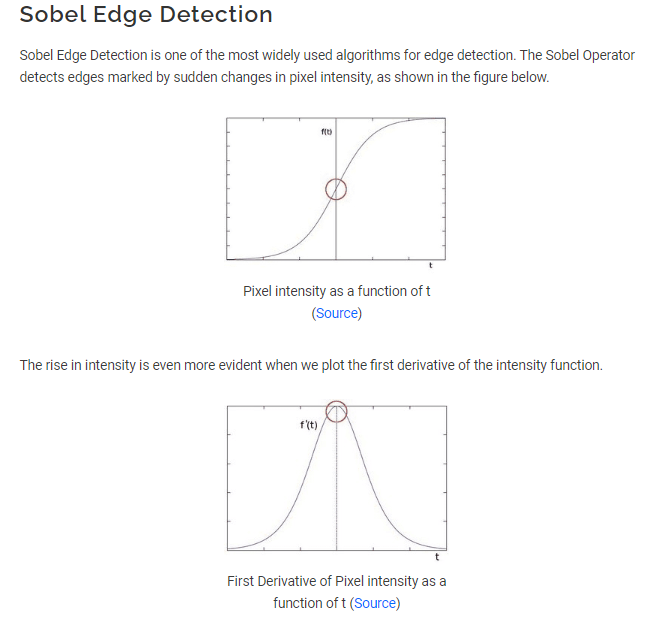

In [24]:
import IPython.display as ds
ds.Image('../input/imagegalary/1.png')
#display('../input/imageGalary/1.png')

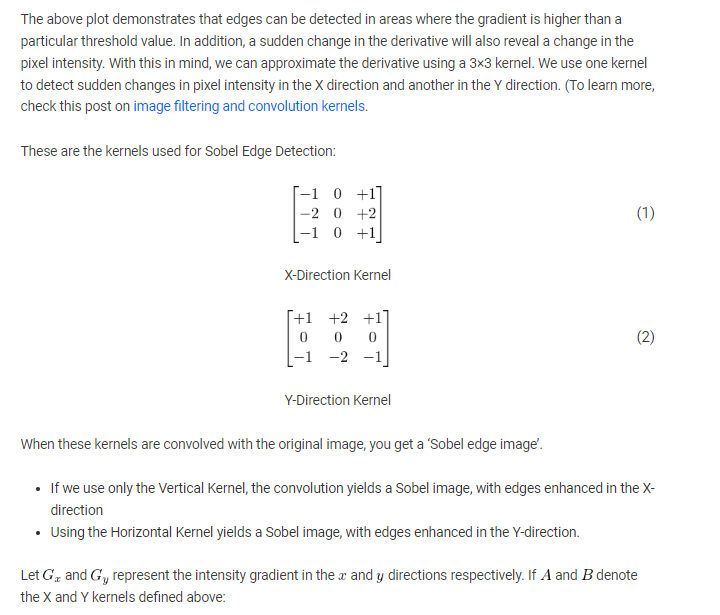

In [25]:
ds.Image('../input/imagegalary/2.png')

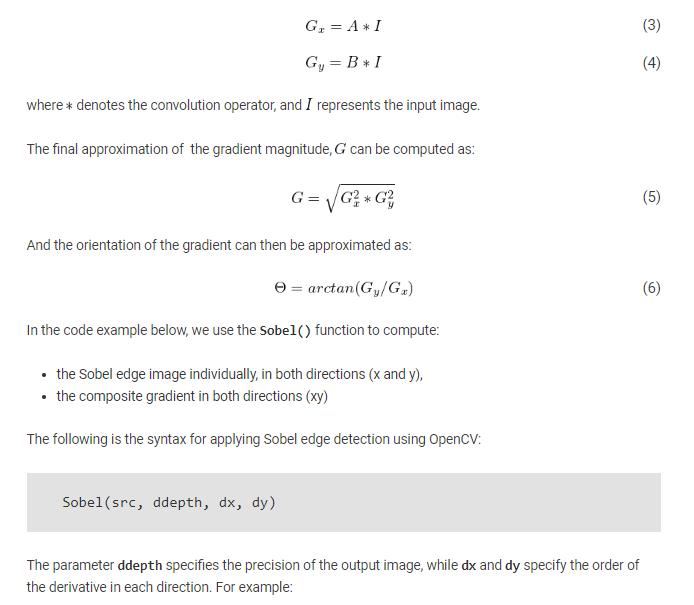

In [26]:
ds.Image('../input/imagegalary/3.png')

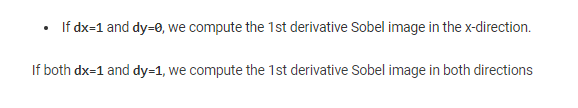

In [27]:
ds.Image('../input/imagegalary/4.png')

In [28]:
def sobelImageShow(title,image):
    plt.imshow(image)
    plt.title(title)
    plt.show()
    

In [29]:
sobelx=cv2.Sobel(src=image_blur,ddepth=cv2.CV_64F,dx=1,dy=0,ksize=5)# dx=1 means edge detection in X-axis
sobely=cv2.Sobel(src=image_blur,ddepth=cv2.CV_64F,dx=0,dy=1,ksize=5) #dy=1 means edge detection in Y-Axis
sobelxy=cv2.Sobel(src=image_blur,ddepth=cv2.CV_64F,dx=1,dy=1,ksize=5) # edge detection in both Axis

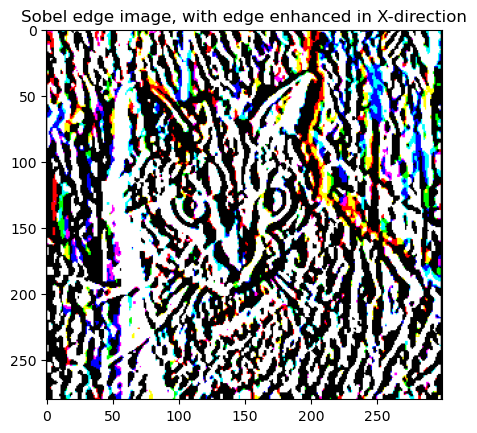

In [30]:
sobelImageShow('Sobel edge image, with edge enhanced in X-direction',sobelx)

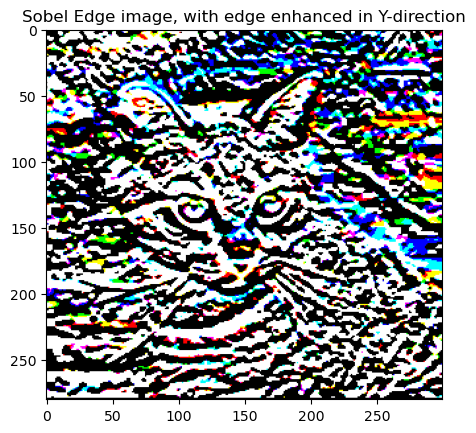

In [31]:
sobelImageShow('Sobel Edge image, with edge enhanced in Y-direction',sobely)

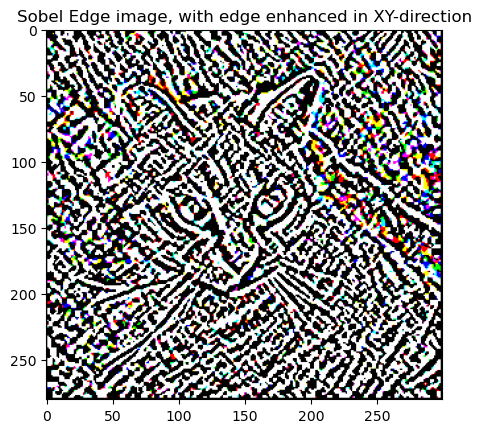

In [32]:
sobelImageShow('Sobel Edge image, with edge enhanced in XY-direction',sobelxy)

# Canny Edge Detection

Canny Edge Detection is one of the most popular edge-detection methods in use today because it is so robust and flexible. The algorithm itself follows a three-stage process for extracting edges from an image. Add to it image blurring, a necessary preprocessing step to reduce noise. This makes it a four-stage process, which includes:

* Noise Reduction
* Calculating the Intensity Gradient of the Image
* Suppression of False Edges
* Hysteresis Thresholding

**Noise Reduction**
Raw image pixels can often lead to noisy edges, so it is essential to reduce noise before computing edges In Canny Edge Detection, a Gaussian blur filter is used to essentially remove or minimize unnecessary detail that could lead to undesirable edges

**Calculating the Intensity Gradient of the Image**
Once the image has been smoothed (blurred), it is filtered with a Sobel kernel, both horizontally and vertically. The results from these filtering operations are then used to calculate both the intensity gradient magnitude (G), and the direction (\Theta) for each pixel, as shown below.

(7) \begin{equation*} G = \sqrt{G_x^2 + G_y^2} \end{equation*}
(8) \begin{equation*} \Theta = tan^{-1}\left(\frac{G_x}{G_y}\right) \end{equation*}
The gradient direction is then rounded to the nearest 45-degree angle.
**
Suppression of False Edges**
After reducing noise and calculating the intensity gradient, the algorithm in this step uses a technique called non-maximum suppression of edges to filter out unwanted pixels (which may not actually constitute an edge). To accomplish this, each pixel is compared to its neighboring pixels in the positive and negative gradient direction. If the gradient magnitude of the current pixel is greater than its neighboring pixels, it is left unchanged. Otherwise, the magnitude of the current pixel is set to zero. 

**Hysteresis Thresholding** – Edge Detection Using OpenCV
In this final step of Canny Edge Detection, the gradient magnitudes are compared with two threshold values, one smaller than the other. 

If the gradient magnitude value is higher than the larger threshold value, those pixels are associated with solid edges and are included in the final edge map.
If the gradient magnitude values are lower than the smaller threshold value, the pixels are suppressed and excluded from the final edge map.
All the other pixels, whose gradient magnitudes fall between these two thresholds, are marked as ‘weak’ edges (i.e. they become candidates for being included in the final edge map). 
If the ‘weak’ pixels are connected to those associated with solid edges, they are also included in the final edge map. 

The following is the syntax for applying Canny edge detection using OpenCV:

**Canny(image, threshold1, threshold2)**


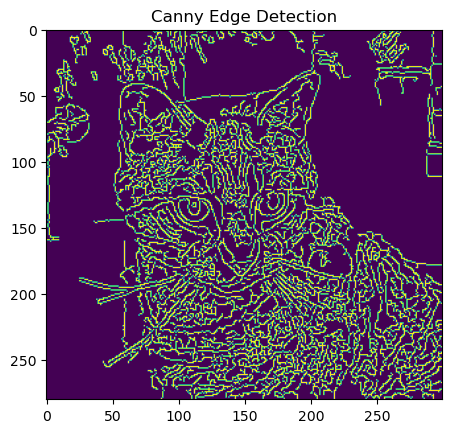

In [33]:
image_canny=cv2.Canny(image_blur,10,100) #we can change the value of threshold to view the different edge
sobelImageShow('Canny Edge Detection',image_canny)

# 6.Flipping image
In OpenCV, an image can be flipped using the function cv2.flip(). Using this function we can flip the image across X-axis, Y-axis and across both axes. It accepts a flag flipCode as an argument to flip the image across the axis.

If the flipCode is set to 0, the image is flipped across the x-axis and if the flipCode is set to a positive integer (say 1), the image is flipped across the Y-axis. If the flipCode is set to a negative integer (say "-1"), the image is flipped across both axes.

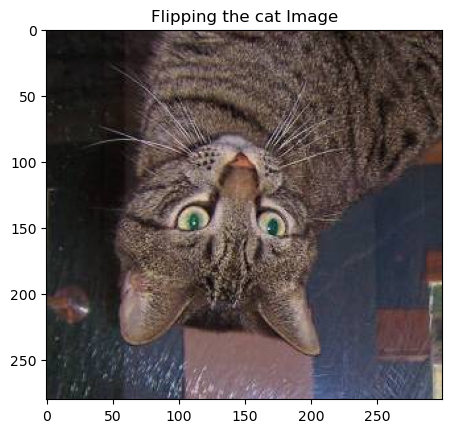

In [34]:
vertical_flip=cv2.flip(image_original,0) # we can chage 0 to -1, 1
imageShow('Flipping the cat Image',vertical_flip)

# 7.Histogram

We use cv2.split function to seperate the three different color channel

In [35]:
blue,green,red=cv2.split(image_original)

In [36]:
blue,green,red

(array([[ 40,  40,  43, ..., 173, 166, 163],
        [ 41,  41,  43, ..., 169, 163, 159],
        [ 41,  41,  43, ..., 166, 164, 162],
        ...,
        [ 31,  29,  25, ...,  17,  24,  40],
        [ 31,  29,  25, ...,  21,  25,  36],
        [ 31,  28,  24, ...,  30,  23,  21]], dtype=uint8),
 array([[ 44,  44,  44, ..., 204, 199, 198],
        [ 45,  45,  44, ..., 200, 196, 194],
        [ 45,  45,  44, ..., 195, 194, 194],
        ...,
        [ 30,  28,  24, ...,  23,  30,  46],
        [ 30,  28,  24, ...,  29,  34,  45],
        [ 30,  27,  23, ...,  38,  32,  30]], dtype=uint8),
 array([[ 39,  39,  40, ..., 207, 202, 201],
        [ 40,  40,  40, ..., 203, 199, 197],
        [ 40,  40,  40, ..., 199, 199, 199],
        ...,
        [ 32,  30,  26, ...,  36,  41,  57],
        [ 32,  30,  26, ...,  42,  44,  55],
        [ 32,  29,  25, ...,  51,  42,  40]], dtype=uint8))

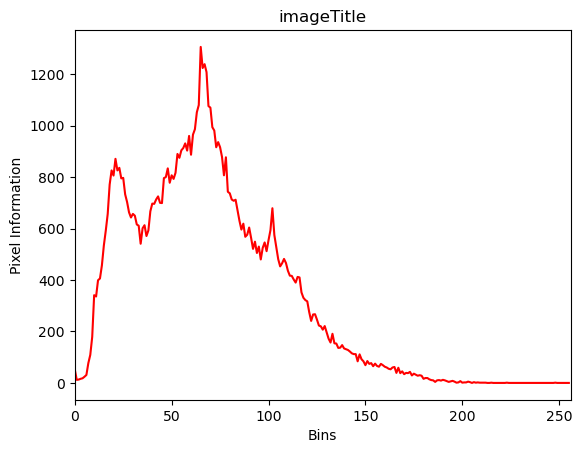

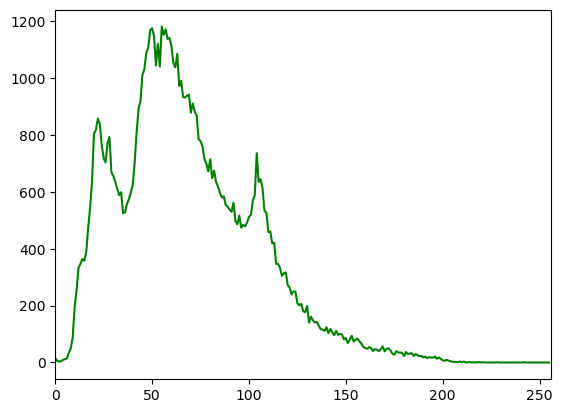

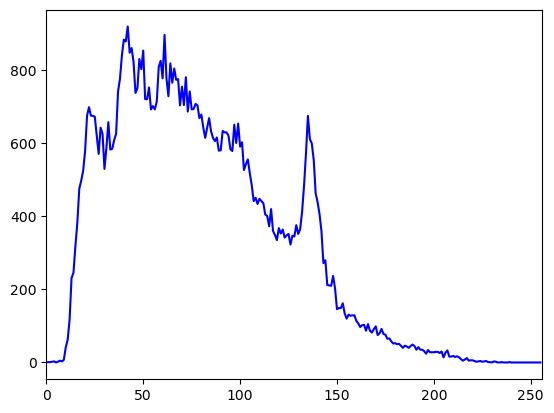

In [37]:
color_channels=cv2.split(image_original)
color_combs=('r','g','b')
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
for (color_channel,color_comb) in zip(color_channels,color_combs):
    histogram=cv2.calcHist([color_channel],[0],None,[256],[0,256])
    plt.plot(histogram,color=color_comb)
    plt.xlim([0, 256])
    plt.show()

**Histogram Calculation : we use cv2.calcHist()(in-built function in OpenCV) to find the histogram.**

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* **images**: it is the source image of type uint8 or float32 represented as “[img]”. 
* **channels** : it is the index of channel for which we calculate histogram. For grayscale image, its value is [0] and color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively. 
* **mask** : mask image. To find histogram of full image, it is given as “None”. 
* **histSize** : this represents our BIN count. For full scale, we pass [256]. 
* **ranges** : this is our RANGE. Normally, it is [0,256].

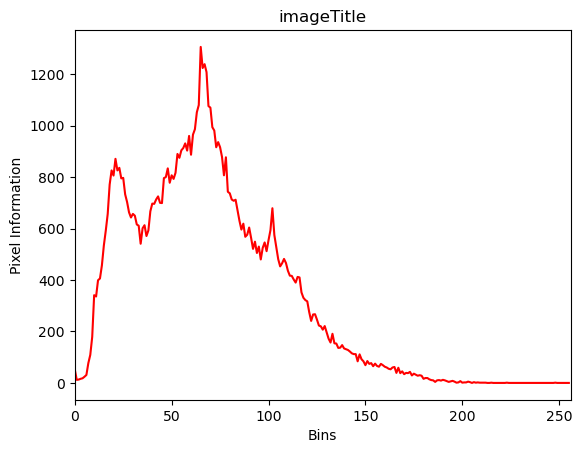

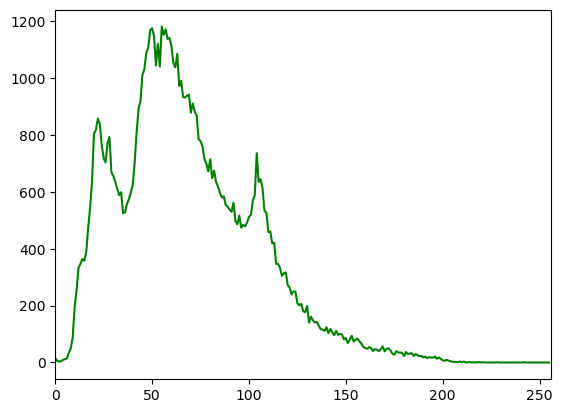

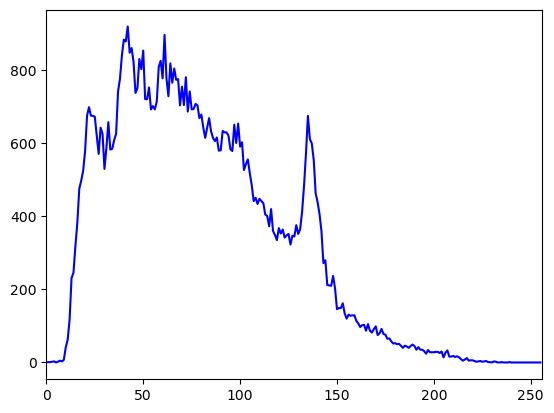

In [38]:
color_channels=cv2.split(image_original)
color_combs=('r','g','b')
plt.title("imageTitle")
plt.xlabel("Bins")
plt.ylabel("Pixel Information")
for (color_channel,color_comb) in zip(color_channels,color_combs):
    histogram=cv2.calcHist([color_channel],[0],None,[256],[0,256])
    plt.plot(histogram,color=color_comb)
    plt.xlim([0, 256])
    plt.show()

# 8. Image Masking with OpenCV

In [39]:
image_original.shape

(280, 300, 3)

# Applying Rectangular Mask

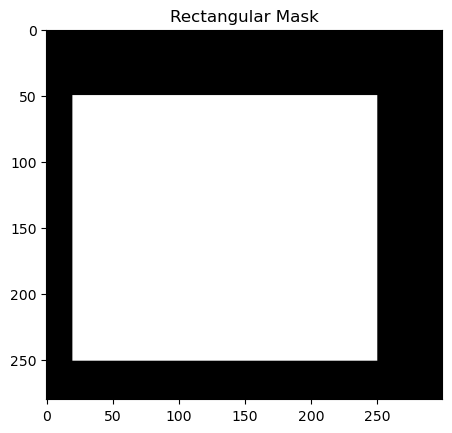

In [40]:
mask = np.zeros(image_original.shape[:2], dtype="uint8") #Create mask as size of the original image
cv2.rectangle(mask, (20, 50), (250, 250), 255, -1) 
# Draw rectangular mask with white color. Here Top left corner is (20,50) 
#and Bottom Right Corner is (200,200), 255 is intensity value 
imageShow("Rectangular Mask", mask)

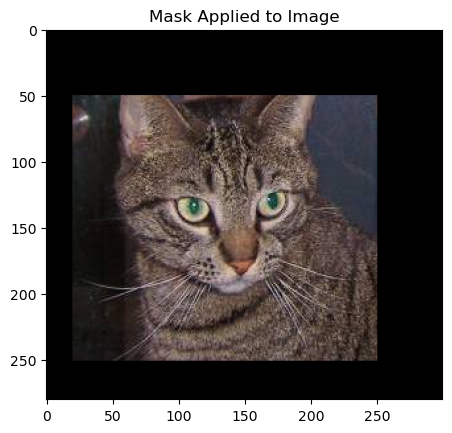

In [41]:
masked = cv2.bitwise_and(image_original, image_original, mask=mask) # Bitwise and between two image
imageShow("Mask Applied to Image", masked)
#cv2.waitKey(0)

# Applying Circular Mask 

In [42]:
mask = np.zeros(image_original.shape[:2], dtype="uint8")
cv2.circle(mask, (130, 120), 85, 255, -1) # Circle Center is (130,120)
masked = cv2.bitwise_and(image_original, image_original, mask=mask)

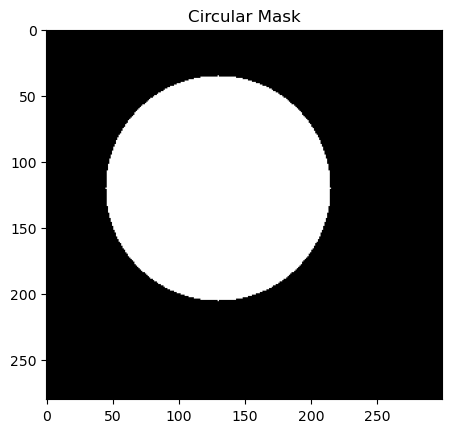

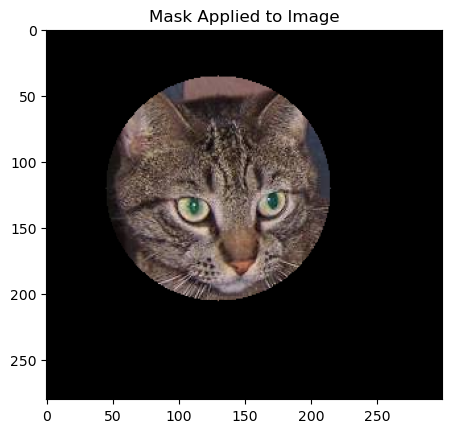

In [43]:
imageShow("Circular Mask", mask)
imageShow("Mask Applied to Image", masked)
